In [245]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [247]:
df=pd.read_csv('earthquake_data_tsunami.csv')
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [249]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [251]:
df.tail()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


In [253]:
df.shape

(782, 13)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [257]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [259]:
df.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

In [261]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [263]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [265]:
## VISUALIZATION

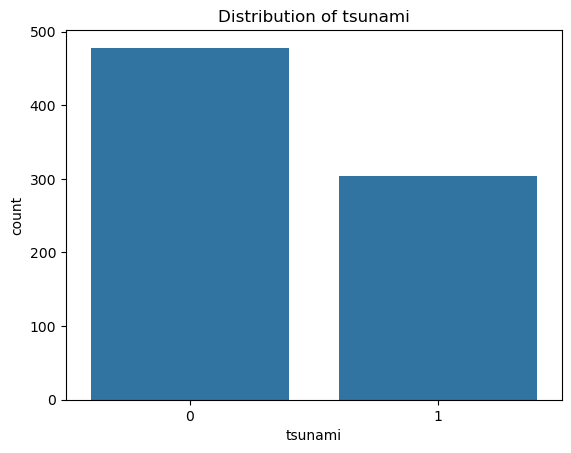

In [267]:
sns.countplot(data=df, x="tsunami")
plt.title("Distribution of tsunami")
plt.show()


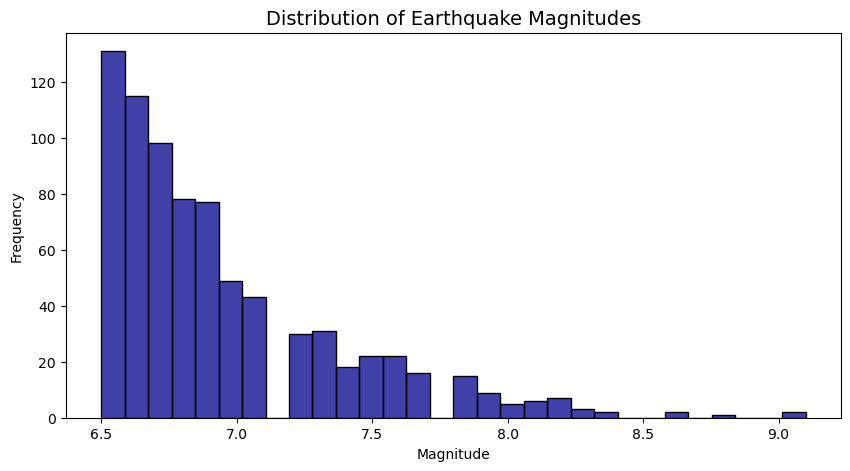

In [269]:
plt.figure(figsize=(10, 5))
sns.histplot(df['magnitude'], bins=30, color='darkblue')
plt.title('Distribution of Earthquake Magnitudes', fontsize=14)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

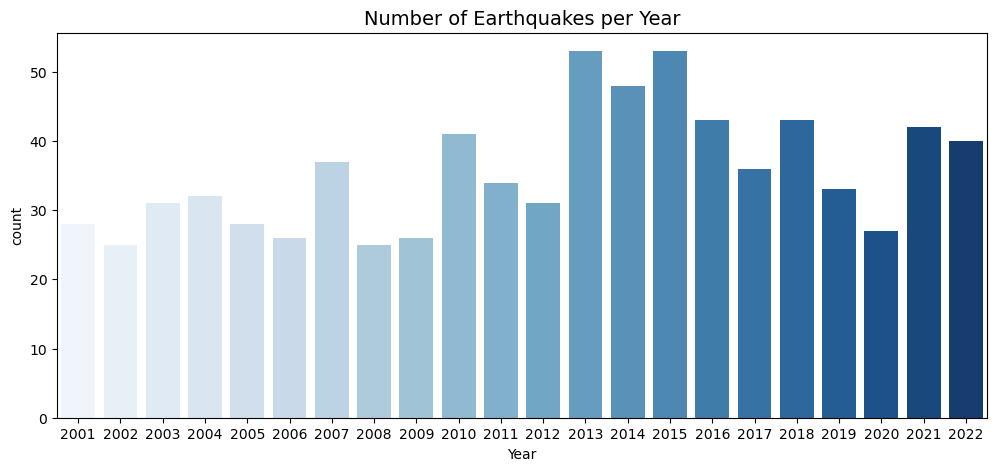

In [270]:
plt.figure(figsize=(12, 5))
sns.countplot(df,x='Year', palette='Blues')
plt.title('Number of Earthquakes per Year', fontsize=14)
plt.show()


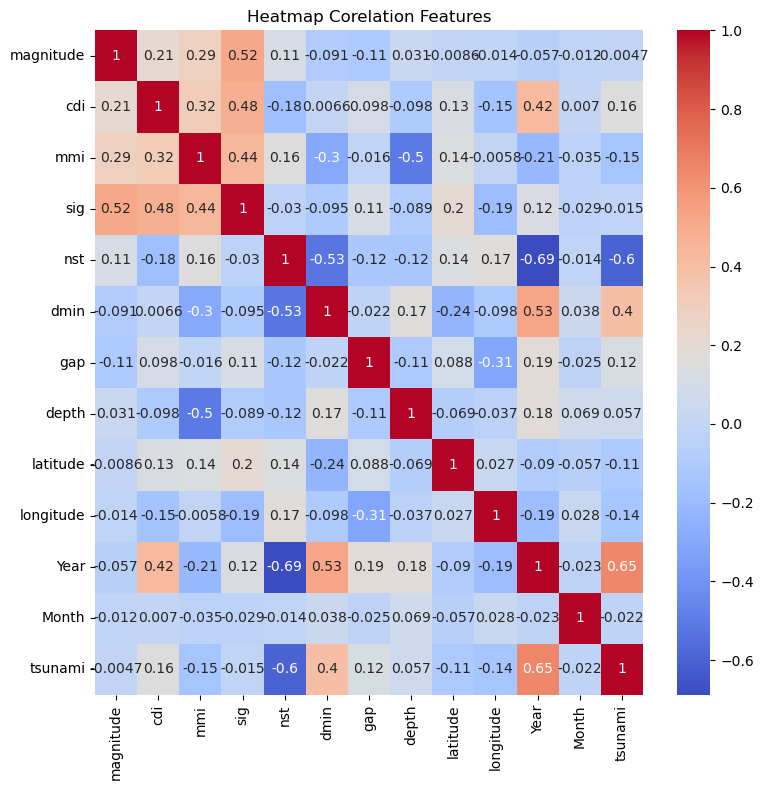

In [272]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap Corelation Features')
plt.tight_layout()
plt.show()

In [274]:
le=LabelEncoder()

In [277]:
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=le.fit_transform(df[column])

In [279]:
df

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [281]:
## DATA SPLITTING

In [283]:
X=df.drop(columns='tsunami')
Y=df['tsunami']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [285]:
## MODEL TRAINING

In [287]:
## LOGISTIC REGRESSION

In [289]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression()

In [291]:
Y_pred1=model1.predict(X_test)
Y_pred1

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [293]:
acc = accuracy_score(Y_test, Y_pred1)
prec = precision_score(Y_test, Y_pred1, average='binary')
f1 = f1_score(Y_test, Y_pred1, average='binary')
rec = recall_score(Y_test, Y_pred1, average='binary')
print("Accuracy:", acc)
print("Precision:", prec)
print("F1 Score:", f1)
print("Sensitivity_Recall:", rec)


Accuracy: 0.7961783439490446
Precision: 0.7236842105263158
F1 Score: 0.7746478873239436
Sensitivity_Recall: 0.8333333333333334


In [295]:
cm = confusion_matrix(Y_test, Y_pred1)
cm

array([[70, 21],
       [11, 55]], dtype=int64)

In [297]:
cr = classification_report(Y_test, Y_pred1)
print("Classification Report:", cr)


Classification Report:               precision    recall  f1-score   support

           0       0.86      0.77      0.81        91
           1       0.72      0.83      0.77        66

    accuracy                           0.80       157
   macro avg       0.79      0.80      0.79       157
weighted avg       0.81      0.80      0.80       157



In [299]:
## DECISION TREE

In [301]:
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [303]:
Y_pred2=model2.predict(X_test)
Y_pred2

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [305]:
acc2 = accuracy_score(Y_test, Y_pred2)
prec2 = precision_score(Y_test, Y_pred2, average='binary') 
f1_2 = f1_score(Y_test, Y_pred2, average='binary')
rec2 = recall_score(Y_test, Y_pred2, average='binary')
print("Accuracy:", acc2)
print("Precision:", prec2)
print("F1 Score:", f1_2)
print("Sensitivity / Recall:", rec2)

Accuracy: 0.910828025477707
Precision: 0.9333333333333333
F1 Score: 0.8888888888888888
Sensitivity / Recall: 0.8484848484848485


In [307]:
cm2 = confusion_matrix(Y_test, Y_pred2)
cm2

array([[87,  4],
       [10, 56]], dtype=int64)

In [309]:
cr2 = classification_report(Y_test, Y_pred2)
print("Classification Report:", cr2)

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93        91
           1       0.93      0.85      0.89        66

    accuracy                           0.91       157
   macro avg       0.92      0.90      0.91       157
weighted avg       0.91      0.91      0.91       157



In [311]:
## RANDOM FOREST

In [313]:
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)

RandomForestClassifier()

In [314]:
Y_pred3=model3.predict(X_test)
Y_pred3

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [317]:
acc3 = accuracy_score(Y_test, Y_pred3)
prec3 = precision_score(Y_test, Y_pred3, average='binary') 
f1_3 = f1_score(Y_test, Y_pred3, average='binary')
rec3 = recall_score(Y_test, Y_pred3, average='binary')
print("Accuracy:", acc3)
print("Precision:", prec3)
print("F1 Score:", f1_3)
print("Sensitivity / Recall:", rec3)

Accuracy: 0.9235668789808917
Precision: 0.8648648648648649
F1 Score: 0.9142857142857143
Sensitivity / Recall: 0.9696969696969697


In [319]:
cm3 = confusion_matrix(Y_test, Y_pred3)
cm3

array([[81, 10],
       [ 2, 64]], dtype=int64)

In [321]:
cr3 = classification_report(Y_test, Y_pred3)
print("Classification Report:", cr3)

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.89      0.93        91
           1       0.86      0.97      0.91        66

    accuracy                           0.92       157
   macro avg       0.92      0.93      0.92       157
weighted avg       0.93      0.92      0.92       157



## XGBClassifier


In [328]:
model4=XGBClassifier()
model4.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [330]:
Y_pred4=model4.predict(X_test)
Y_pred4

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1])

In [332]:
acc4 = accuracy_score(Y_test, Y_pred4)
prec4 = precision_score(Y_test, Y_pred4, average='binary') 
f1_4 = f1_score(Y_test, Y_pred4, average='binary')
rec4 = recall_score(Y_test, Y_pred4, average='binary')
print("Accuracy:", acc4)
print("Precision:", prec4)
print("F1 Score:", f1_4)
print("Sensitivity / Recall:", rec4)

Accuracy: 0.9299363057324841
Precision: 0.9104477611940298
F1 Score: 0.9172932330827067
Sensitivity / Recall: 0.9242424242424242


In [334]:
cm4 = confusion_matrix(Y_test, Y_pred4)
cm4

array([[85,  6],
       [ 5, 61]], dtype=int64)

In [338]:
cr4 = classification_report(Y_test, Y_pred4)
print("Classification Report:", cr4)

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.93      0.94        91
           1       0.91      0.92      0.92        66

    accuracy                           0.93       157
   macro avg       0.93      0.93      0.93       157
weighted avg       0.93      0.93      0.93       157



In [340]:
## CONCLUSION

In [ ]:
a simple Random Forest model predicted whether a title is a Movie or TV Show with 99% accuracy compared to other models
